# EDA Assignment

## Haberman Dataset:

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer. 
Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
haberman = pd.read_csv('haberman.csv')

In [4]:
print(haberman.shape)

(306, 4)


In [5]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

## 2D Scatter Plot

<function matplotlib.pyplot.show(*args, **kw)>

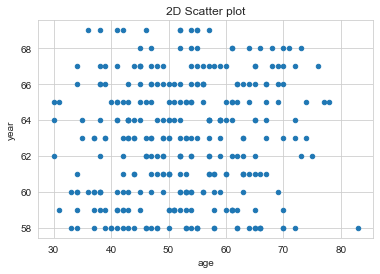

In [25]:
haberman.plot(kind='scatter',x='age',y='year')
plt.title('2D Scatter plot')
plt.legend
plt.show

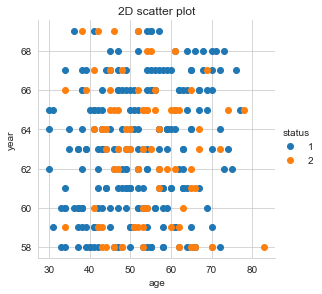

In [26]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=4) \
   .map(plt.scatter,'age','year') \
   .add_legend()
plt.title("2D scatter plot")
plt.show()
    

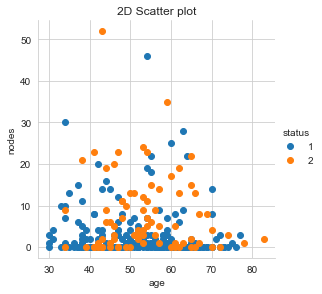

In [27]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=4) \
   .map(plt.scatter,'age','nodes') \
   .add_legend()
plt.title("2D Scatter plot")
plt.show()

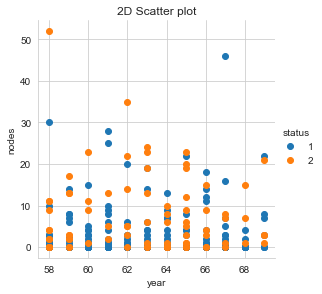

In [28]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',height=4) \
   .map(plt.scatter,'year','nodes') \
   .add_legend()
plt.title("2D Scatter plot")
plt.show()

#### Observations:

1. It is difficult to scatter the features age, year and nodes using 2D scatter plot.
2. We'll try to distinguish the features with the help of pair plot.


## Pair Plots

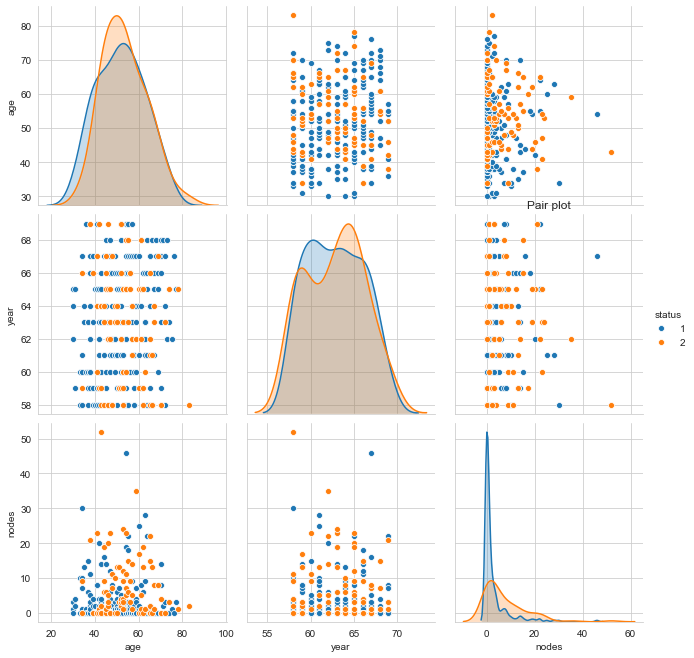

In [13]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='status', height=3)
plt.title("Pair plot")
plt.show()

#### Observations:

1. From all the above 9 pair-plots, I could conclude that the age and nodes feature is selected.
2. Out of all the plots, the plot between nodes and age gives the a better plot as compared to other pair-plots.


## 1-D Plot

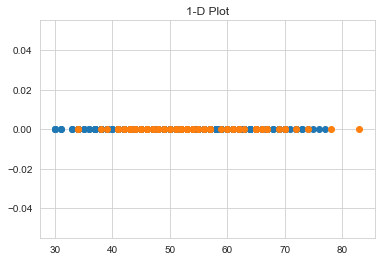

In [14]:
haberman_survived = haberman.loc[haberman['status'] == 1]
haberman_not_survived = haberman.loc[haberman['status'] == 2]
plt.plot(haberman_survived['age'],np.zeros_like(haberman_survived['age']),'o')
plt.plot(haberman_not_survived['age'],np.zeros_like(haberman_not_survived['age']),'o')
plt.title("1-D Plot")
plt.legend
plt.show()

## PDF

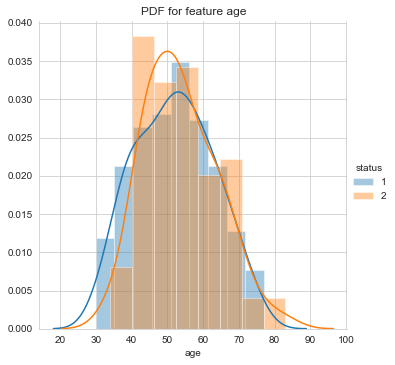

In [15]:
sns.FacetGrid(haberman, hue='status', height=5) \
   .map(sns.distplot,'age') \
   .add_legend()
plt.title("PDF for feature age")
plt.show()

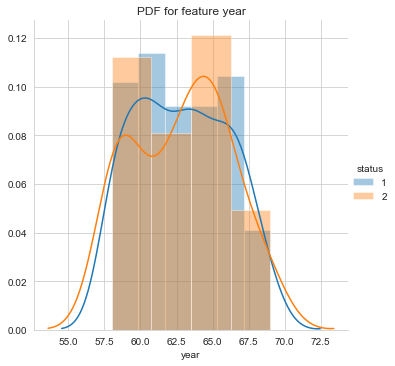

In [16]:
sns.FacetGrid(haberman, hue='status', height=5) \
   .map(sns.distplot,'year') \
   .add_legend()
plt.title("PDF for feature year")
plt.show()

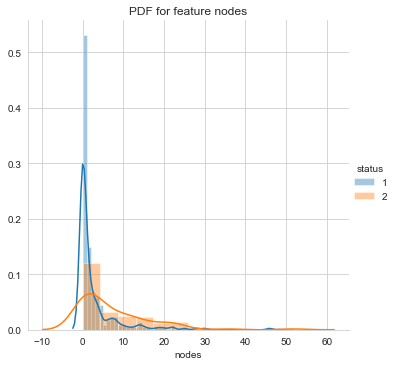

In [17]:
sns.FacetGrid(haberman, hue='status', height=5) \
   .map(sns.distplot,'nodes') \
   .add_legend()
plt.title("PDF for feature nodes")
plt.show()

#### Observations:

1. From all the pdf above, we can say that the pdf of nodes is better as compared to others.
2. We could roughly conclude that if the number of nodes are less, there is a high chance of survival more than 5 years.
3. Approximately if number of nodes is between 0 and 2, the chance of survival is more and beyond that the chance of survival decreases.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


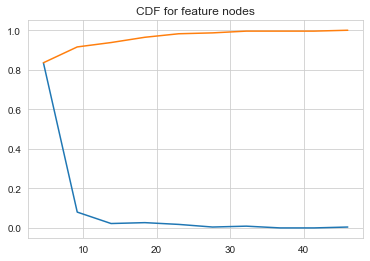

In [18]:
counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF for feature nodes")
plt.legend
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


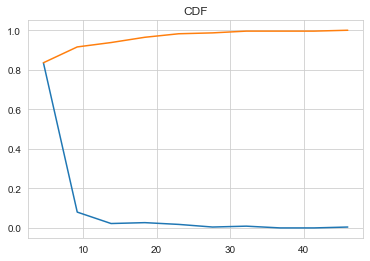

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


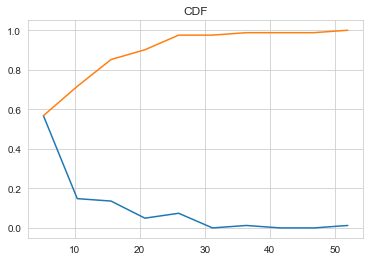

In [21]:
# For people who survived after 5 years
counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF")
plt.show()


# For people who did not survived after 5 years
counts, bin_edges = np.histogram(haberman_not_survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF")
plt.show()


#### Observations:

-> For people who survived after 5 years
1. Looking the cdf of number of nodes, 83% of people survive who have nodes below 10.
2. 5% of people survive who have nodes between 10 and 20.
3. 100% of the people have less chance of survival if the number of nodes are greater than 40. 

-> For people who did not survived after 5 years
1. Here 58% of people in short survival have nodes less than 5.
2. 100% of people in short survival if the nodes are greater than 40.

## Mean, Variance and Standard Deviation

In [18]:
print('Mean:')
print(np.mean(haberman_survived['nodes']))
#for outliers
print(np.mean(np.append(haberman_survived['nodes'],50)))
print(np.mean(haberman_not_survived['nodes']))

print('\nStd-Dev:')
print(np.std(haberman_survived['nodes']))
print(np.std(haberman_not_survived['nodes']))

Mean:
2.7911111111111113
3.0
7.45679012345679

Std-Dev:
5.857258449412131
9.128776076761632


#### Observations:

1. The mean of the patients who survived after 5 years is 2.79 and along with outliers is 3.77, which is almost similar.
2. By looking at the mean values, the probability of the patients who did not survived after 5 years is more in the dataset.
3. By looking at the standard deviation values, the spread of the data for patients who did not survived more than 5 years is more.

## Median, Percentile, Quantile, Inter Quantile Range(IQR), Median Absolute Deviation(MAD)

In [19]:
#Median
print('Median:')
print(np.median(haberman_survived['nodes']))
#for outliers
print(np.median(np.append(haberman_survived['nodes'],50)))
print(np.median(haberman_not_survived['nodes']))

#Quantile
print('\nQuantiles:')
print(np.percentile(haberman_survived['nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_not_survived['nodes'],np.arange(0,100,25)))

#90th percentile
print('\n90th Percentile:')
print(np.percentile(haberman_survived['nodes'],90))
print(np.percentile(haberman_not_survived['nodes'],90))

#Median Absolute Deviation(MAD)
from statsmodels import robust
print('\nMedian Absolute Deviation:')
print(robust.mad(haberman_survived['nodes']))
print(robust.mad(haberman_not_survived['nodes']))

Median:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentile:
8.0
20.0

Median Absolute Deviation:
0.0
5.930408874022408


#### Observations:


1. From median values, the average number of nodes for patients who survived after 5 years is zero and for the patients who did not survived after 5 years is 4.
2. Quantiles for patients who survived after 5 years, 75% of patients have nodes less than 3.
3. For the patients who did not survived after 5 years, 75% of patients have number of nodes less than 11.

## Box Plots


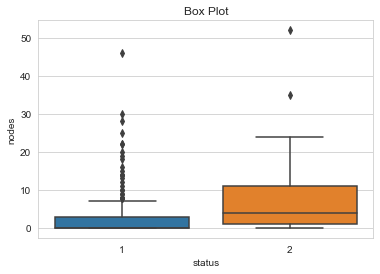

In [22]:
sns.boxplot(data=haberman, x='status', y='nodes')
plt.title("Box Plot")
plt.show()

#### Observations:

1. The box plot could be seen as horizontal pdf.
2. The maximum number of nodes for the patients who survived after 5 years is 7. 
3. The maximum number of nodes for the patients who did not survived after 5 years is 24.
4. For nodes between 0 to 7, there is a error as the box plot of the patients who did not survived after 5 years also lies in that range. 

## Violin Plots


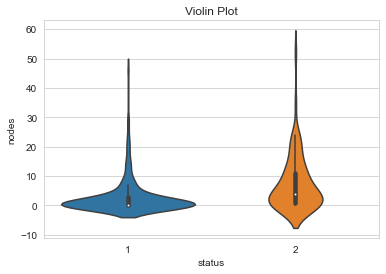

In [24]:
sns.violinplot(data=haberman, x='status', y='nodes', height=8)
plt.title("Violin Plot")
plt.show()

#### Observations:

1. The density of patients who survived after 5 years is more near 0 and the range of the plot is between 0 to 7.
2. The density of patients who did not survived after 5 years is more from 0 to 20.

#### Conclusion:

1. We can daignose cancer using Haberman's data set by applying various techniques.
2. The number of nodes feature is important feature among all features.
3. By analysing the data, we can see that if the patients who survived after 5 years had less number of nodes as compared to the patients who did not survived after 5 years.
4. As the number of nodes increases the probability of long survival decreases.